In [ ]:
from pyqae.images import viz, pull_img_http_array
import pyqae.nd as nd_array # multidimensional distributed arrays
import numpy as np

In [2]:
BIG_IMG_TEST = "https://c2.staticflickr.com/6/5828/30038826823_f99e42c200_o_d.jpg"
LIL_IMG_TEST = "https://c1.staticflickr.com/9/8120/29988110901_ca4c8eb32e_h_d.jpg"
test_img = pull_img_http_array(BIG_IMG_TEST)

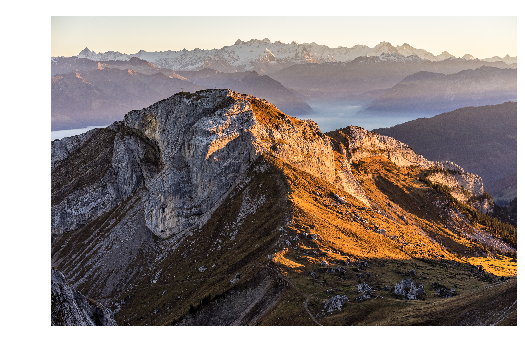

In [3]:
%matplotlib inline
_ = viz.show_image(test_img)

In [4]:
from pyqae.simplespark import LocalSparkContext 
dist_img = nd_array.sp_array(np.expand_dims(test_img,0), sc, axis = (0,))
print(dist_img, dist_img.shape)

BoltArray
mode: spark
shape: (1, 4912, 7360, 3)
 (1, 4912, 7360, 3)


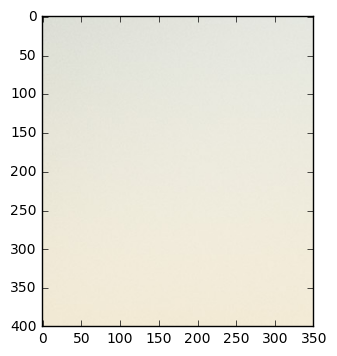

In [13]:
import matplotlib.pyplot as plt
plt.imshow(dist_img[0,100:500, 150:500, :].toarray())

In [7]:
chunk_image = dist_img.chunk(size = (256, 256), padding = (14, 14))
print(chunk_image)

Chunked BoltArray
shape: (1, 4912, 7360, 3)



In [14]:
chunk_image[0,50:100, 50:100, :]

TypeError: 'ChunkedArray' object is not subscriptable

In [49]:
from skimage.filters.rank import median
from skimage.morphology import disk

In [99]:
c_selem = disk(32)

In [100]:
%%time
no_pad_img = nd_array.filt_tensor(dist_img, median, selem = c_selem).toarray()
no_pad_img

CPU times: user 2.17 s, sys: 280 ms, total: 2.44 s
Wall time: 1min 33s


In [101]:
%%time
pad_img = nd_array.filt_tensor(dist_img, median, padding = (12, 12), selem = c_selem).toarray()

CPU times: user 298 ms, sys: 244 ms, total: 542 ms
Wall time: 2min 57s


In [102]:
%%time
std_img = nd_array.stack([median(test_img[:,:,i], c_selem) for i in range(test_img.shape[2])],0).swapaxes(0,2).swapaxes(0,1)

CPU times: user 2min 19s, sys: 3.03 s, total: 2min 22s
Wall time: 2min 37s


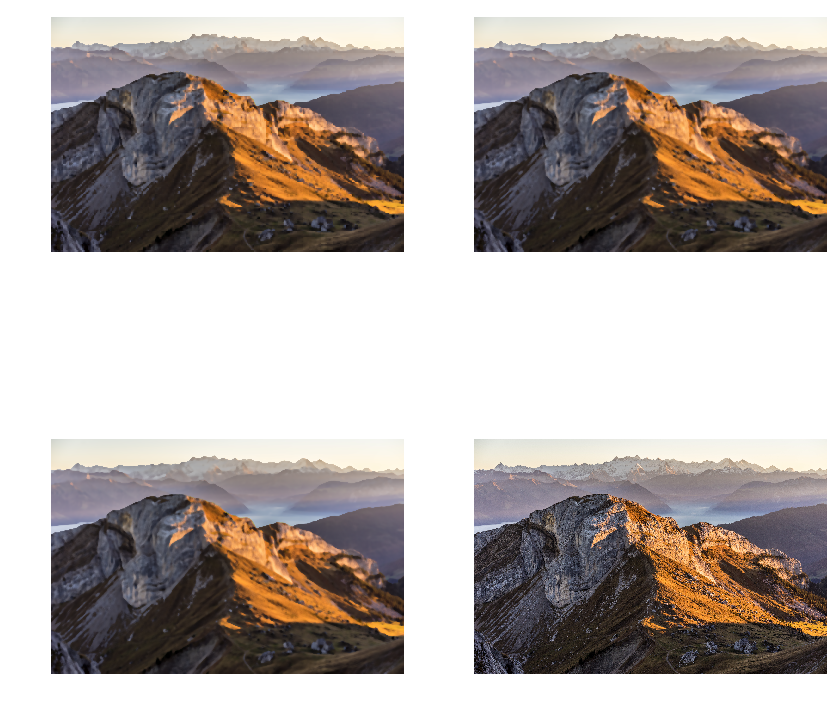

In [106]:
_ = viz.show_multi_images(no_pad_img[0], pad_img[0], std_img, test_img)

In [107]:
from skimage.filters import gaussian
from skimage.morphology import disk

In [108]:
?gaussian